In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [16]:
hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 1e-15 # Coupling capacitance 1 fF
C_tot = C + C_c
omega = 2*np.pi*5e9 # qubit frequency 5 GHz
T_sep = 2*np.pi/omega # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
print(pulse_width*1e12,' ps')

1.033916924267275  ps


In [35]:
def ddf(x,width):
    val = np.zeros_like(x)
    val[(-(width/2)<=x) & (x<=(width/2))] = 1
    return val

def sfq_pulses(n,T_sep):
    t = np.linspace(0,T_sep*n,n*1000)
    pulses = V_max*ddf(t,pulse_width)
    for i in range(n):
        pulses = np.add(pulses,V_max*ddf(t-T_sep*(i+1),pulse_width))
    return t,pulses


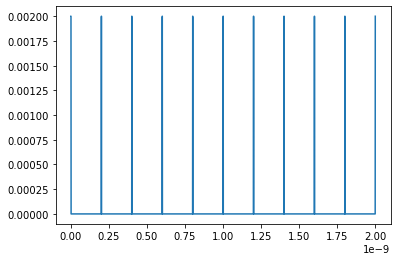

In [38]:
t,pulses = sfq_pulses(10,T_sep)
plt.plot(t,pulses)

In [ ]:
V_sfq = sfq_pulses(40,T_sep)

def transmon_hamiltonian(Ec=0.386, EjEc=45, nstates=8, ng=0.0, T=10.0):
    """Transmon Hamiltonian

    Args:
        Ec: capacitive energy
        EjEc: ratio `Ej` / `Ec`
        nstates: defines the maximum and minimum states for the basis. The
            truncated basis will have a total of ``2*nstates + 1`` states

        ng: offset charge
        T: gate duration
    """

    Ej = EjEc * Ec
    n = np.arange(-nstates, nstates + 1)
    up = np.diag(np.ones(2 * nstates), k=-1)
    do = up.T
    H0 = qutip.Qobj(np.diag(4 * Ec * (n - ng) ** 2) - Ej * (up + do) / 2.0)
    H1 = qutip.Qobj(-2 * np.diag(n))

    return [H0, [H1, V_sfq]]